<a href="https://colab.research.google.com/github/pandu1992/belajarpython.com/blob/master/Test_DQN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#
# Imports and settings
#
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import functools
import matplotlib.animation as animation
import itertools

plt.rcParams.update({'font.family':'DejaVu Sans', 'font.serif':['DejaVu Sans']})
plt.rcParams.update({'pdf.fonttype': 'truetype', 'font.size': 18})

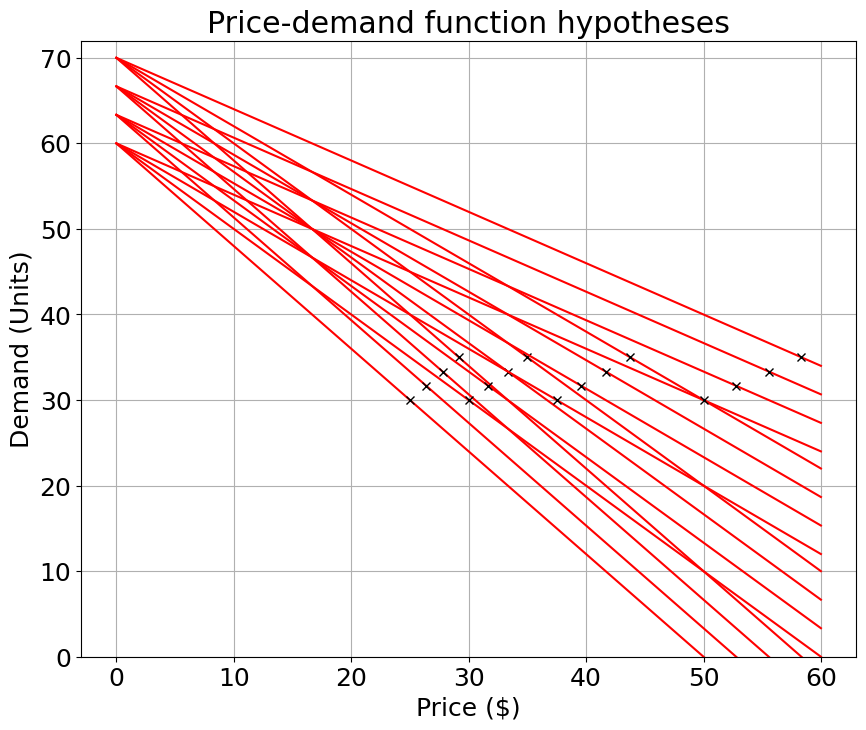

In [8]:
def linear(a, b, x):
    return b + a*x


def demand_hypotheses(a_vec, b_vec):
    for a, b in itertools.product(a_vec, b_vec):
        yield {
            'd': functools.partial(linear, a, b),
            'p_opt': -b/(2*a)
        }

start = -1.2
end = -0.6


h_vec = list(demand_hypotheses(np.linspace(start, end, 4), np.linspace(60, 70, 4)))

prices = np.linspace(0, 60, 100)
fig = plt.figure(figsize=(10, 8))
plt.xlabel('Price ($)')
plt.ylabel('Demand (Units)')
plt.ylim(0, 72)
plt.title('Price-demand function hypotheses')
plt.grid(True)
for d in h_vec:
    plt.plot(prices, list(map(d['d'], prices)), 'r-')
    plt.plot([d['p_opt']], d['d'](d['p_opt']), 'kx', linewidth=0.2)
plt.show()

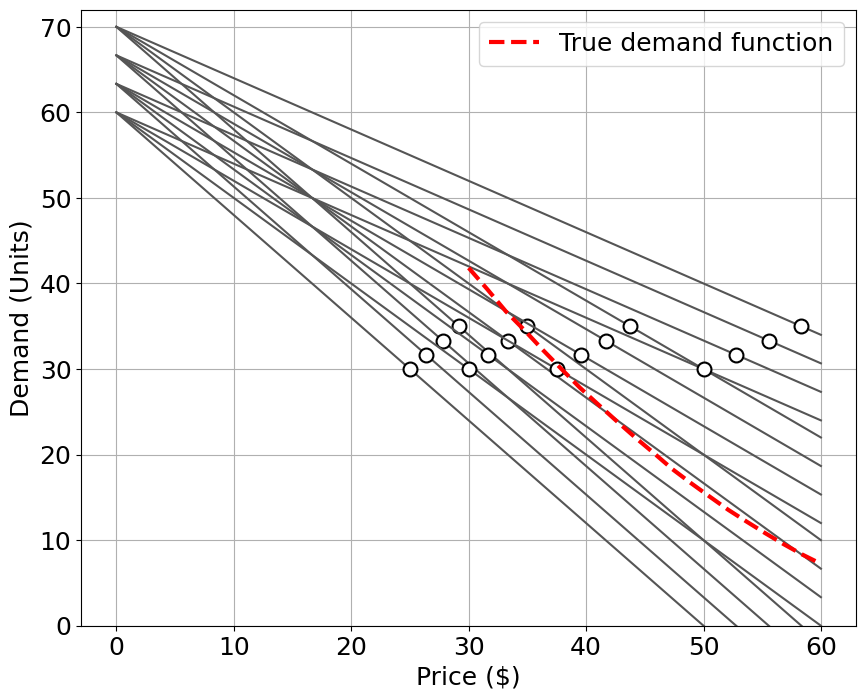

In [10]:
def sample_actual_demand(price):
    avg_demand = 65 + (-0.8) * price
    theta = 0.1/4
    k = avg_demand / theta
    return np.random.gamma(k*theta, k*theta**2, 1)[0]

def empirical_mean(sampler, n):
    mean = 0
    for i in range(1, n):
        mean = mean + sampler()
    return mean/n

def emperical_demand_curve(min_price, max_price, n):
    prices = np.linspace(min_price, max_price, n)
    sampling = 5000
    demands = map(lambda p: empirical_mean(functools.partial(sample_actual_demand, p), sampling), prices)
    return np.dstack((prices, list(demands)))[0]

curve = np.transpose(emperical_demand_curve(30, 60, 20))

fig = plt.figure(figsize=(10, 8))
for i, d in enumerate(h_vec):
    plt.plot(prices, list(map(d['d'], prices)), '-', color='#555555');
    plt.plot([d['p_opt']], d['d'](d['p_opt']), 'ko', markeredgewidth=1.5, markerfacecolor='w', markersize=10)

plt.plot(curve[0], curve[1], 'r--', linewidth=3.0, label='True demand function')
plt.xlabel('Price ($)')
plt.ylabel('Demand (Units)')
plt.ylim(0, 72)
plt.grid(True)
plt.legend()

plt.show()